# Vapor Pressure Deficit

Vapor pressure deficit is a measure of the atmospheric demand (or atmospheric "thirst") for water and is a variable tightly related to plant transpiration and evaporation. THe variable is rather simple to compute and only depends on air temperature and air relative humidity.

Specifically, the vapor pressure deficit is computed as the difference between the saturated vapor pressure and the actual vapor pressure:

**Saturated vapor pressure:**
$$e_{sat} = 0.611 \; exp\Bigg(\frac{17.502 T} {T + 240.97}\Bigg)$$

**Actual vapor pressure:**
$$e_{act} = e_{sat} \frac{RH}{100}$$

**Vapor pressure deficit:**
$$VPD = e_{sat} - e_{act}$$


$e_{sat}$ is the saturated vapor pressure deficit (in kPa)

$e_{act}$ is the actual vapor pressure (in kPa)

$VPD$ is the vapor pressure deficit (in kPa)

$T$ is air temperature in degrees Celsius

$RH$ is relative humidity in percentage

The goal is to create a Python **function** that calculates the vapor pressure deficit given air temperature and relative humidity as inputs.


In [1]:
# Import modules
import numpy as np


In [3]:
# Define function

def vpdfun(T,RH):
    """
    Function that calculates the air vapor pressure deficit.
    
    Inputs:
    T   = Air temperature        [Celsius]
    RH  = Air relative humidity  [%]
    
    Outputs:
    VPD = Vapor pressure deficit [kPa]
    """

    e_sat = 0.611 * np.exp((17.502*T)/(T + 240.97)); # kPa
    e_act = e_sat * RH/100; # kPa
    return np.round(e_sat - e_act, 2)


In [6]:
N = 100 # Number of points

# Create vectors for each variable
T = np.linspace(0, 40, N)
RH = np.linspace(0, 100, N)

# Create mesh
T_grid, RH_grid = np.meshgrid(T,RH)


In [7]:
print(np.round(T_grid))
print(np.round(RH_grid))


[[ 0.  0.  1. ... 39. 40. 40.]
 [ 0.  0.  1. ... 39. 40. 40.]
 [ 0.  0.  1. ... 39. 40. 40.]
 ...
 [ 0.  0.  1. ... 39. 40. 40.]
 [ 0.  0.  1. ... 39. 40. 40.]
 [ 0.  0.  1. ... 39. 40. 40.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [ 98.  98.  98. ...  98.  98.  98.]
 [ 99.  99.  99. ...  99.  99.  99.]
 [100. 100. 100. ... 100. 100. 100.]]


In [8]:
# Estimate vapor pressure deficit using grids as input
VPD = vpdfun(T_grid,RH_grid)
print(VPD)


[[ 0.61  0.63  0.65 ...  7.07  7.22  7.38]
 [ 0.6   0.62  0.64 ...  7.    7.15  7.31]
 [ 0.6   0.62  0.63 ...  6.93  7.08  7.23]
 ...
 [ 0.01  0.01  0.01 ...  0.14  0.15  0.15]
 [ 0.01  0.01  0.01 ...  0.07  0.07  0.07]
 [ 0.    0.   -0.   ...  0.    0.   -0.  ]]


In [9]:
# Check dimensions of input and output matrices
print(T_grid.shape)
print(RH_grid.shape)
print(VPD.shape)


(100, 100)
(100, 100)
(100, 100)


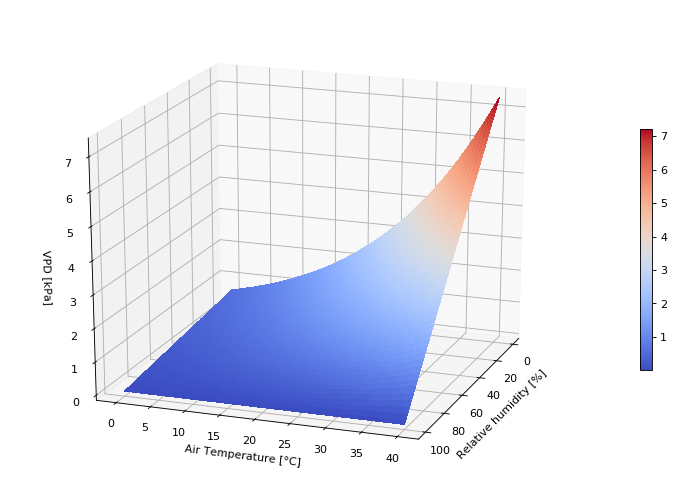

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create figure
fig = plt.figure(figsize=(12, 8), dpi=80)

# Get figure axes and convert it to a 3D projection
ax = fig.gca(projection='3d')

# Add surface plot to axes. Save this surface plot in a variable
surf = ax.plot_surface(RH_grid, T_grid, VPD, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add colorbar to figure based on ranges in the surf map.
fig.colorbar(surf, shrink=0.5, aspect=20)

# Label x,y, and z axis
ax.set_xlabel('Relative humidity [%]')
ax.set_ylabel("Air Temperature [\N{DEGREE SIGN}C]")
ax.set_zlabel('VPD [kPa]')

# Set position of the 3D plot
ax.view_init(elev=20, azim=20) # elevation and azimuth. Change their value to see what happens.

plt.show()

